In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
x_train = [1, 2, 3, 4, 5]

y_train = [2+1, 2*2+1, 3*2+1, 9, 11] 
signal_length = len(x_train)
y_noise = np.random.normal(0, 1, signal_length)

y_train = y_train + y_noise

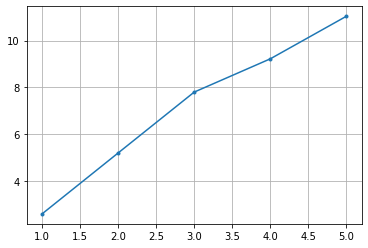

In [3]:
plt.plot(x_train, y_train,'.-')
plt.grid()

In [4]:
useRandom = False

In [5]:
if useRandom:
    W = tf.Variable(tf.random_normal([1]), name='weight')
    b = tf.Variable(tf.random_normal([1]), name='bias')
else:
    w0 = 7.0;
    b0 = 5.0;

    W = tf.Variable(w0*tf.ones([1]), name='weight')
    b = tf.Variable(b0*tf.ones([1]), name='bias')

$$ H(x)=Wx + b $$

In [6]:
hypothesis = x_train * W + b


$$loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 \tag{1}$$

In [7]:
loss = tf.reduce_mean(tf.square(hypothesis - y_train))

In [8]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

In [9]:
sess = tf.Session()

In [10]:
sess.run(tf.global_variables_initializer())

In [16]:
nb_epoch = 500
vloss = [] #empty list
vb = [] #empty list
vw = [] #empty list
for step in range(nb_epoch):
    sess.run(train)
    loss1 = sess.run(loss)
    vloss.append(loss1)
    
    if step % 50 == 0: # 5번마다
        w1 = sess.run(W)[0] # 기울기
        b1 = sess.run(b)[0] # bias
        
        print(step,'\t', loss1, '\t', w1, '\t',b1)

0 	 0.1335108 	 2.0944123 	 0.8824679
50 	 0.13351052 	 2.0945375 	 0.88201725
100 	 0.13351022 	 2.0946424 	 0.8816367
150 	 0.13350981 	 2.0947316 	 0.8813155
200 	 0.13350973 	 2.0948067 	 0.8810444
250 	 0.13350955 	 2.0948699 	 0.8808155
300 	 0.13350947 	 2.0949235 	 0.880622
350 	 0.1335094 	 2.094969 	 0.8804588
400 	 0.13350955 	 2.0950067 	 0.88032126
450 	 0.13350941 	 2.0950394 	 0.88020456


Text(0, 0.5, 'loss')

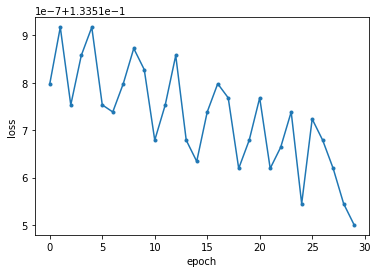

In [17]:
plt.plot(vloss[:30],'.-')
plt.xlabel('epoch')
plt.ylabel('loss')

In [18]:
w1 = sess.run(W)[0] # 기울기
b1 = sess.run(b)[0] # bias

In [19]:
print(w1, b1)


2.0950658 0.88010836


In [20]:
str1 = 'y = ' + str(w1) +'x + ' + str(b1)
print(str1)

y = 2.0950658x + 0.88010836


Text(0.5, 1.0, 'y = 2.0950658x + 0.88010836')

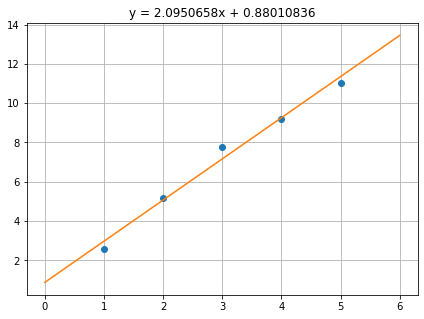

In [21]:
plt.figure(figsize=(7,5)) 
plt.plot(x_train, y_train,'o') #train data 그리기

# 직선 그래프를 그리기 위한 코드
# 그래프의 x좌표를 일정 간격으로 설정함
x1 = np.linspace(np.min(x_train)-1, np.max(x_train)+1)
y1 = w1*x1 + b1
plt.plot(x1, y1)

plt.grid() # 격자
#plt.axis((np.min(x_train) - 1, np.max(x_train) + 1, np.min(y_train) - 1, np.max(y_train) + 1))
plt.title(str1)